In [241]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

#Visualize first your dataset and then write the Kmean algorithm

In [242]:
dataset

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0
5,-1.988864,1.713443,-1.0
6,2.835925,6.653662,1.0
7,-1.250864,1.971740,-1.0
8,2.152984,6.004102,1.0
9,2.962082,5.537159,1.0


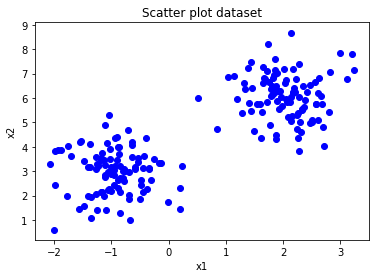

In [243]:
#Visualize first your dataset and then write the Kmean algorithm

plt.scatter(x1, x2, c='b', alpha=1)
plt.title('Scatter plot dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [244]:
## Store the target value
classes = dataset['c']  

## Drop the Class value from dataset

dataset = dataset.drop(['c'],axis=1) 

## Convert dataframe into list and then into a numpy array
d = dataset.values.tolist() 
d = np.array(d)

## First 100 points are used for training and the rest is used for testing
train_d = d[:100]  
test_d = d[100:]

In [245]:
dataset

,x,y
0,-0.334207,2.058738
1,3.264395,5.636814
2,-0.669884,1.856185
3,1.995284,4.484924
4,3.588041,4.739172
5,-1.988864,1.713443
6,2.835925,6.653662
7,-1.250864,1.971740
8,2.152984,6.004102
9,2.962082,5.537159


In [246]:
## K-Means Algorithm
import random
import numpy as np
# Randomly place the centroids of clusters 

M1 = [float(np.random.randint(dataset['x'].min(),dataset['x'].max())),float(np.random.randint(dataset['y'].min(),dataset['y'].max()))]
M2 = [float(np.random.randint(dataset['x'].min(),dataset['x'].max())),float(np.random.randint(dataset['y'].min(),dataset['y'].max()))]

## Intialize the number of iterations you want to run 
Num_iterarion = 1
while(Num_iterarion <= 100):
    cluster_1 = []
    cluster_2 = []
       
    for i in train_d:
        ## Find the eucledian distance between all points the centroid
        distance_M1 = ((M1[0]-i[0])**2 + (M1[1]-i[1])**2)**0.5
        distance_M2 = ((M2[0]-i[0])**2 + (M2[1]-i[1])**2)**0.5
        
        All_distances = [distance_M1,distance_M2]
        ## Find the closest centroid to the point and assign the point to that cluster
        closest_position = All_distances.index(min(All_distances))
        if(closest_position == 0):
            cluster_1.append(i)
        elif(closest_position == 1):
            cluster_2.append(i)
        
    ## Store the centroid values to calculate new centroid values 
    previous_M1 = M1
    previous_M2 = M2
    
    cluster_1 = np.array(cluster_1)
    cluster_2 = np.array(cluster_2)
    
    # Find mean of all points within a cluster and make it as the centroid 
    if(len(cluster_1) != 0):
        M1 = [sum(cluster_1[:,0])/float(len(cluster_1)),
              sum(cluster_1[:,1])/float(len(cluster_1))]
    if(len(cluster_2) != 0):
        M2 = [sum(cluster_2[:,0])/float(len(cluster_2)),
              sum(cluster_2[:,1])/float(len(cluster_2))]
   
    ## If centroid values hasn't changed, algorithm has convereged 
    if(previous_M1 == M1 and previous_M2 == M2):
        print("Converged")
        break
    print(Num_iterarion)
    Num_iterarion += 1

1
2
Converged


In [247]:
prediction = []
for i in test_d:
    ## Find distance between test data point and centroids
    distance_M1 = ((M1[0]-i[0])**2 + (M1[1]-i[1])**2)**0.5
    distance_M2 = ((M2[0]-i[0])**2 + (M2[1]-i[1])**2)**0.5
    
    ## Find the cluster to which the point is closest to and append 
    ## it to prediction
    All_distances = [distance_M1,distance_M2]
    position = All_distances.index(min(All_distances))
    prediction.append(position)
    ## Print the predictions 
    print(prediction)

[1]
[1, 0]
[1, 0, 0]
[1, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]


In [248]:
from sklearn.cluster import KMeans 

clf = KMeans(n_clusters = 2)
clf.fit(train_d)
prediction = clf.predict(test_d)

In [249]:
prediction

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int32)